In [1]:
import pandas as pd

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.api as sm
# from statsmodels.compat import lzip

from Econometric_models import POLS_reg, fixedEffect, randomEffect
from Eco_specification_tests import ADF, Anderson_Darling, LM_test, f_test_sm, BreuschPagan, hausman_test, QQ_plot, Breusch_Godfrey, variance_inflation_factor, Wool_test

https://financestu.com/strict-exogeneity/#3_Strict_Exogeneity_Tests

In [2]:
from Econometric_models import fe_lin

### Importing data and setting up structure

In [3]:
df_econ = pd.read_excel('df_eco_ver5.xlsx', header=[0], index_col=0)

In [4]:
df_econ_copy = df_econ.copy()

In [5]:
type = pd.Categorical(df_econ.port_id)
df_eco_multi = df_econ.set_index(['port_id', 'roll_id'])
df_eco_multi['groups'] = type

df_eco_copy = df_eco_multi.copy()

In [6]:
df_with_dummies = df_econ.copy()

entity_dummies_ols = pd.get_dummies(df_eco_copy.index.get_level_values('port_id'), drop_first=True, prefix='port').astype(int)
df_with_dummies = df_with_dummies.join(entity_dummies_ols) 

In [7]:
type = pd.Categorical(df_with_dummies.port_id)
df_eco_multi_dum = df_with_dummies.set_index(['port_id', 'roll_id'])
df_eco_multi_dum['groups'] = type

### Pooled OLS Model

In [8]:
pols_ret = POLS_reg(df_eco_copy['Return'], df_eco_copy[['E_Score', 'S_Score', 'G_Score']] , summary=False)

### FE Model

In [9]:
# Regression from statsmodels
FE_e = fixedEffect(df_econ['Return'], df_econ['E_Score'], df_eco_copy, False)
FE_s = fixedEffect(df_econ['Return'], df_econ['S_Score'], df_eco_copy, False)
FE_g = fixedEffect(df_econ['Return'], df_econ['G_Score'], df_eco_copy, False)
FE_all = fixedEffect(df_econ['Return'], df_econ[['E_Score', 'S_Score', 'G_Score']], df_eco_copy, False)
FE_all_pred = fixedEffect(df_econ['Return'], df_econ[['E_Score', 'S_Score', 'G_Score']], df_eco_copy, True)

In [10]:
#Regression from linearmodels
FE_e_lin = fe_lin(df_eco_copy['Return'], df_eco_copy['E_Score'])
FE_s_lin = fe_lin(df_eco_copy['Return'], df_eco_copy['S_Score'])
FE_g_lin = fe_lin(df_eco_copy['Return'], df_eco_copy['G_Score'])
FE_all_lin = fe_lin(df_eco_copy['Return'], df_eco_copy[['E_Score', 'S_Score','G_Score']])

### RE Model

In [11]:
RE_all = randomEffect(df_econ_copy['Return'], df_econ_copy[['E_Score', 'S_Score', 'G_Score']], ['port_1', 'port_2', 'port_3', 'port_4', 'port_5'], df_econ_copy, df_eco_copy)
RE_e = randomEffect(df_econ_copy['Return'], df_econ_copy[['E_Score']], ['port_1', 'port_2', 'port_3', 'port_4', 'port_5'], df_econ_copy, df_eco_copy)
RE_s = randomEffect(df_econ_copy['Return'], df_econ_copy[['S_Score']], ['port_1', 'port_2', 'port_3', 'port_4', 'port_5'], df_econ_copy, df_eco_copy)
RE_g = randomEffect(df_econ_copy['Return'], df_econ_copy[['G_Score']], ['port_1', 'port_2', 'port_3', 'port_4', 'port_5'], df_econ_copy, df_eco_copy)

## Test for Stationarity

### Augemented Dickey-Fuller Test

In [12]:
## setting up dictionary:
ADF_data = {
    'return' : df_econ_copy['Return'],
    'E' : df_econ['E_Score'],
    'S' : df_econ['S_Score'],
    'G' : df_econ['G_Score'],
}
# the ADF test
ADF_results = ADF(ADF_data, df_econ_copy['Return'])


ADF Test Results for return:
Test Statistic: -1.5854448735200242
P-value: 0.4909007961343657
Critical Values:
  1%: -3.4586084859607156
  5%: -2.873972159235721
  10%: -2.57339565928848
------------------------
ADF Test Results for E:
Test Statistic: -4.16990804547787
P-value: 0.0007405919255882805
Critical Values:
  1%: -3.4586084859607156
  5%: -2.873972159235721
  10%: -2.57339565928848
------------------------
ADF Test Results for S:
Test Statistic: -3.028925579372457
P-value: 0.03227999781612221
Critical Values:
  1%: -3.458731141928624
  5%: -2.8740258764297293
  10%: -2.5734243167124093
------------------------
ADF Test Results for G:
Test Statistic: -3.8865152395786953
P-value: 0.0021363595447892025
Critical Values:
  1%: -3.4586084859607156
  5%: -2.873972159235721
  10%: -2.57339565928848
------------------------
Test Statistic: -1.5854448735200242
P-value: 0.4909007961343657


#### Plots for ADF

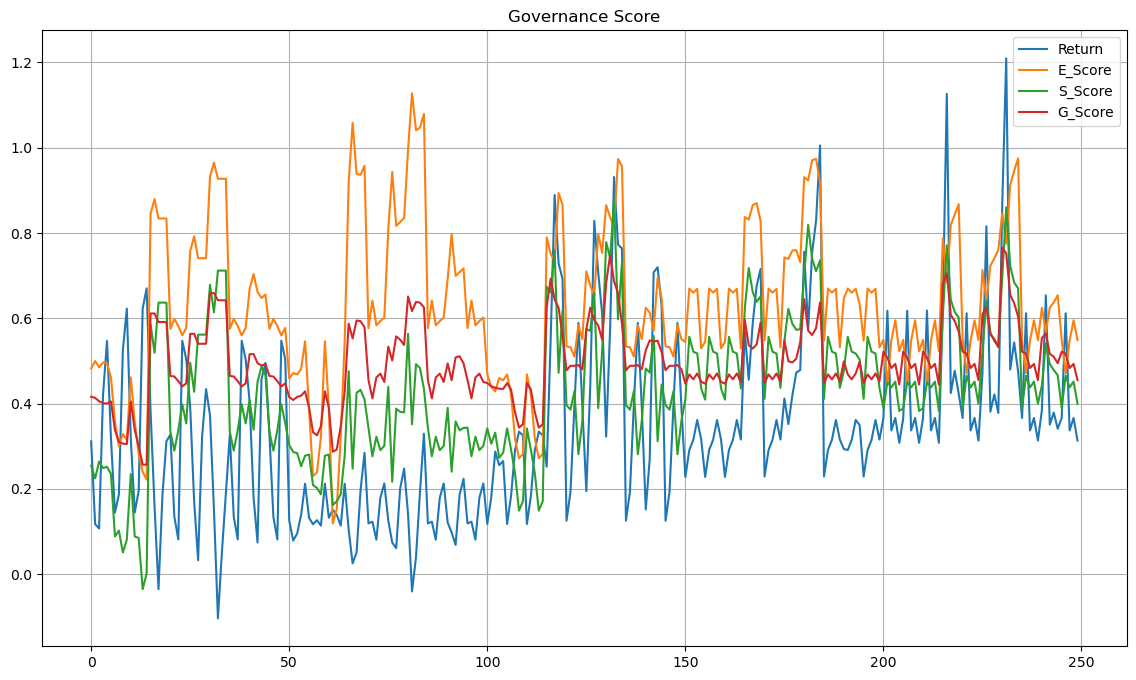

In [13]:
df_econ['Return'][:].plot(figsize=(14,8), title='Return Score', grid=True).legend()
df_econ['E_Score'][:].plot(figsize=(14,8), title='Environment Score').legend()
df_econ['S_Score'][:].plot(figsize=(14,8), title='Social Score',grid = True).legend()
df_econ['G_Score'][:].plot(figsize=(14,8), title='Governance Score',grid=True).legend()

## Correlation Matrix

           Return   E_Score   S_Score   G_Score
Return   1.000000  0.161748  0.455929  0.360578
E_Score  0.161748  1.000000  0.708486  0.816216
S_Score  0.455929  0.708486  1.000000  0.781937
G_Score  0.360578  0.816216  0.781937  1.000000


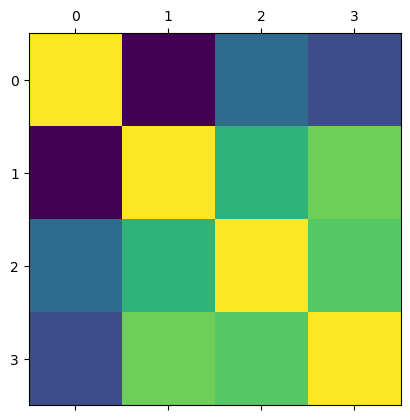

In [14]:
df_corr = df_econ[['Return', 'E_Score', 'S_Score', 'G_Score']].corr(method='spearman')
print(df_corr)
# print(df_corr.to_latex())
plt.matshow(df_econ[['Return', 'E_Score', 'S_Score', 'G_Score']].corr(method='spearman'))
plt.show()

In [15]:
eigenvalues = np.linalg.eigvals(df_corr)
eigenvalues

array([2.72512325, 0.88409743, 0.23407876, 0.15670056])

In [16]:
E_exog = variance_inflation_factor(df_eco_copy['E_Score'])
S_exog = variance_inflation_factor(df_eco_copy['S_Score'])
G_exog = variance_inflation_factor(df_eco_copy['G_Score'])
All_exog = variance_inflation_factor(df_eco_copy[['E_Score', 'S_Score', 'G_Score']])

In [17]:
print('VIF values for:')
print('\n')
print(E_exog)
print('\n')
print(S_exog)
print('\n')
print(G_exog)
print('\n')
print(All_exog)

VIF values for:


const      12.789576
E_Score     1.000000
Name: VIF, dtype: float64


const      8.119951
S_Score    1.000000
Name: VIF, dtype: float64


const      32.109233
G_Score     1.000000
Name: VIF, dtype: float64


const      48.645695
E_Score     3.359778
S_Score     3.258723
G_Score     5.256203
Name: VIF, dtype: float64


## Model Selection

#### Loglikelyhood test (non-nested) and F-test (nested)

#### F-test between POLS and FE



#### Loglikelyhood test

In [18]:
model_unrestricted = sm.OLS(df_eco_copy['Return'], df_eco_copy[['E_Score', 'S_Score', 'G_Score']]).fit()

# Perform likelihood ratio test
lr_test = FE_all.compare_lr_test(model_unrestricted)

lr_stat = lr_test[0]
df_model_diff = lr_test[2]
p_value = lr_test[1]

# Print likelihood ratio, degrees of freedom, and p-value
print(f"Likelihood ratio: {lr_stat}")
print(f"Df numerator: {df_model_diff}")
print(f"P-value: {p_value}")

Likelihood ratio: 30.10821848617161
Df numerator: 5.0
P-value: 1.404255334913292e-05


#### F-test to see effect of fixed effects

In [19]:
f_test_sm(FE_all, 'FE_restriced', model_unrestricted, 'unrestricted')

Reject the null hypothesis: FE_restriced provides a statistically significant improvement over unrestricted.
p-value: 2.0036629765743083e-05
F-statistic: 6.194475027990873


In the above to test we check the effect dummy variables have to capture the fixed effects. F-test is used since we have a nested model. But test state the same. 

### F-test between POLS and FE

In [20]:
f_test_sm(FE_e, 'FE', pols_ret, 'POLS')
f_test_sm(FE_s, 'FE', pols_ret, 'POLS')
f_test_sm(FE_g, 'FE', pols_ret, 'POLS')
f_test_sm(FE_all, 'FE', pols_ret, 'POLS')

Reject the null hypothesis: FE provides a statistically significant improvement over POLS.
p-value: 0.029269943412198553
F-statistic: 3.582794572462041
Reject the null hypothesis: FE provides a statistically significant improvement over POLS.
p-value: 4.393391444951022e-05
F-statistic: 10.456899670952481
Reject the null hypothesis: FE provides a statistically significant improvement over POLS.
p-value: 2.855566651866466e-05
F-statistic: 10.925485260348339
Reject the null hypothesis: FE provides a statistically significant improvement over POLS.
p-value: 8.589530428085471e-06
F-statistic: 7.612574334663868


### LM test

general test for heteroscedasticity that does not assume a specific functional form

In [21]:
LM_test(FE_all, 'all')

LM test for: all (51.81525694026215, 6.3490555335698635e-09, <class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=8.926625169115763, p=9.112929028981757e-10, df_denom=239, df_num=7>)


In [22]:
LM_Fe_e = LM_test(FE_e, 'FE_e')


LM test for: FE_e (3.5394258566617545, 0.6174305727334356, <class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.6979456946883607, p=0.6254737864262507, df_denom=243, df_num=5>)


#### Breusch-Pagan test

In [23]:
BreuschPagan(RE_e)
BreuschPagan(RE_s)
BreuschPagan(RE_g)
BreuschPagan(RE_all)



[('LM Statistic', 15.467417920532633), ('LM-Test p-value', 8.393979225685598e-05), ('F-Statistic', 16.35559379545976), ('F-Test p-value', 7.013750492541921e-05)]
[('LM Statistic', 3.9758481340288476), ('LM-Test p-value', 0.04615720293002067), ('F-Statistic', 4.007778625638004), ('F-Test p-value', 0.046379902151938435)]
[('LM Statistic', 28.29981211828786), ('LM-Test p-value', 1.0390607001632397e-07), ('F-Statistic', 31.65695740898525), ('F-Test p-value', 4.955635605571973e-08)]
[('LM Statistic', 3.979399609439882), ('LM-Test p-value', 0.2636972093311411), ('F-Statistic', 1.3263554655831573), ('F-Test p-value', 0.2663395729215695)]


In [24]:
BreuschPagan(pols_ret)

[('LM Statistic', 4.28024509070013), ('LM-Test p-value', 0.2327496243028353), ('F-Statistic', 1.4283755800056213), ('F-Test p-value', 0.2350323399088942)]


In [25]:
BreuschPagan(RE_all)
BreuschPagan(FE_all)

[('LM Statistic', 3.979399609439882), ('LM-Test p-value', 0.2636972093311411), ('F-Statistic', 1.3263554655831573), ('F-Test p-value', 0.2663395729215695)]
[('LM Statistic', 45.549667640580466), ('LM-Test p-value', 1.0695246125402402e-07), ('F-Statistic', 7.702198686184177), ('F-Test p-value', 2.103570504595185e-08)]


In [26]:
BreuschPagan(FE_e)
BreuschPagan(FE_s)
BreuschPagan(FE_g)
BreuschPagan(FE_all)


[('LM Statistic', 22.236094976135128), ('LM-Test p-value', 0.00047215747773265347), ('F-Statistic', 4.764237927522783), ('F-Test p-value', 0.00035787415106152553)]
[('LM Statistic', 38.79767511378715), ('LM-Test p-value', 2.608249404749444e-07), ('F-Statistic', 8.964515644289712), ('F-Test p-value', 7.796428133897386e-08)]
[('LM Statistic', 37.99242202282513), ('LM-Test p-value', 3.7864880555001526e-07), ('F-Statistic', 8.745112851171172), ('F-Test p-value', 1.203834542722368e-07)]
[('LM Statistic', 45.549667640580466), ('LM-Test p-value', 1.0695246125402402e-07), ('F-Statistic', 7.702198686184177), ('F-Test p-value', 2.103570504595185e-08)]


In [27]:
BreuschPagan(pols_ret)

[('LM Statistic', 4.28024509070013), ('LM-Test p-value', 0.2327496243028353), ('F-Statistic', 1.4283755800056213), ('F-Test p-value', 0.2350323399088942)]


### Hausman

In [28]:
FE_all_RE_all = hausman_test(FE_all, RE_all, lin=False)
print(FE_all_RE_all)

(56.528430626530906, 4, 1.5536127939697053e-11)


### Linearity Check

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

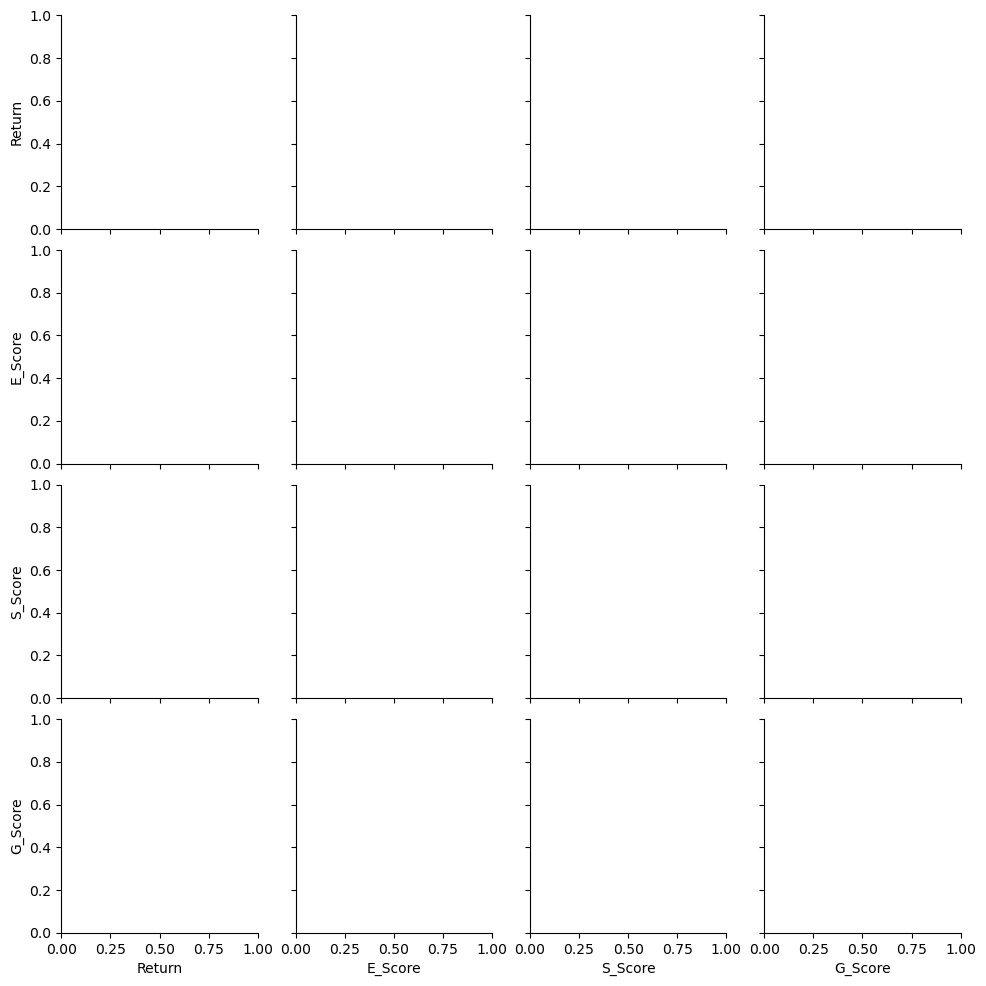

In [29]:
sns.pairplot(df_eco_copy[['Return', 'E_Score', 'S_Score', 'G_Score']])

In [ ]:
# fig = plt.figure(figsize=(12,8))



# #produce regression plots
 # fig = sm.graphics.plot_regress_exog(FE_all, 'E_Score', 'S_Score', 'G_Score', fig=fig)

# fig = sm.graphics.plot_regress_exog(FE_all, 'E_Score', fig=fig)


In [ ]:
# fig = plt.figure(figsize=(12,8))
# fig = sm.graphics.plot_regress_exog(FE_all, 'S_Score', fig=fig)


In [ ]:
# fig = plt.figure(figsize=(12,8))
# fig = sm.graphics.plot_regress_exog(FE_all, 'G_Score', fig=fig)

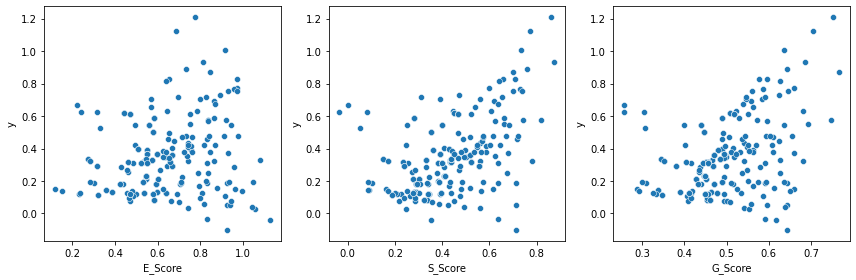

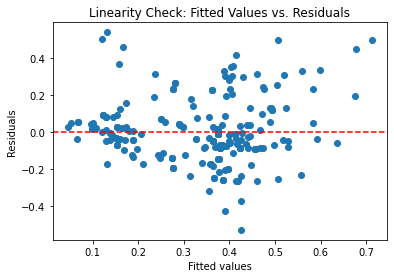

In [ ]:
# Scatter plots
fig, axes = plt.subplots(1, len(df_econ_copy[['E_Score', 'S_Score', 'G_Score']].columns), figsize=(12, 4))

for i, col in enumerate(df_econ_copy[['E_Score', 'S_Score', 'G_Score']].columns):
    sns.scatterplot(x=df_econ_copy[col], y=df_econ_copy['Return'], ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('y')

plt.tight_layout()
plt.show()


# Residual plot
plt.scatter(FE_all.fittedvalues, FE_all.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Linearity Check: Fitted Values vs. Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### Breusch-Godfrey & Durbin-Watson

In [ ]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(FE_all.resid)

1.2407261376198155

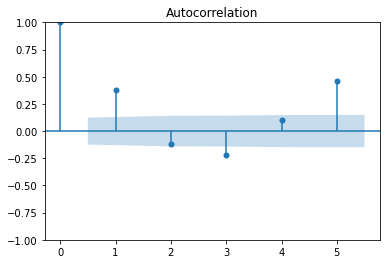

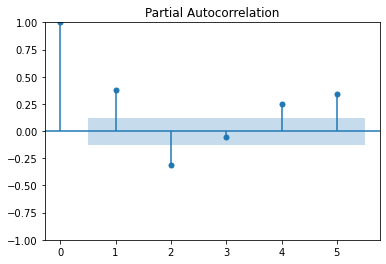

In [ ]:
FE_all_res = FE_all.resid
acf = sm.tsa.stattools.acf(FE_all_res)

# Plot ACF
plot_acf(FE_all_res, lags=5)
plt.show()

# Calculate PACF
pacf = sm.tsa.stattools.pacf(FE_all_res)

# Plot PACF
plot_pacf(FE_all_res, lags=5)
plt.show()

In [ ]:
BG = Breusch_Godfrey(FE_all, 5)
BG

(90.9629377426014,
 4.217037451045224e-18,
 27.11093368928677,
 1.1649825477931468e-21)

### Normality

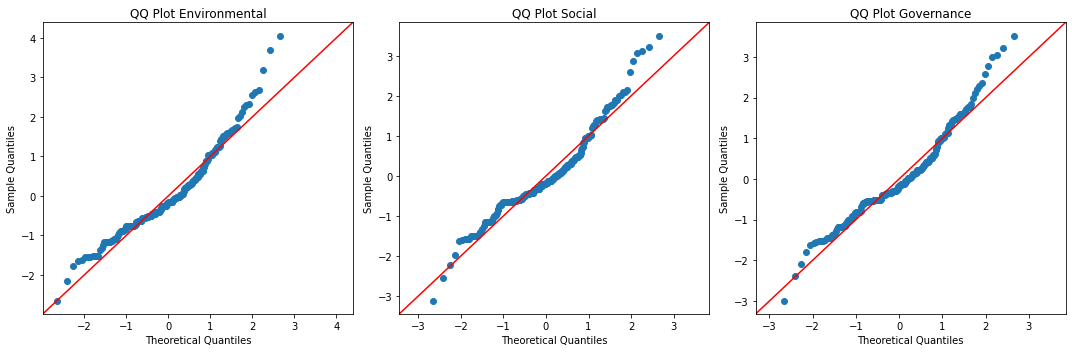

In [ ]:
res_e = FE_e.resid
res_s = FE_s.resid
res_g = FE_g.resid

QQ_plot([res_e, res_s, res_g], ['Environmental', 'Social', 'Governance'])

In [ ]:
Anderson_Darling(FE_all)

Anderson-Darling Test Statistic:  4.882248631099145
Critical Values:
Level 15.0: 0.567
Level 10.0: 0.646
Level 5.0: 0.775
Level 2.5: 0.904
Level 1.0: 1.075
Reject the null hypothesis: Residuals are not normally distributed.


### WOOLDRIDGE TEST - STRICT EXOGENeity

In [ ]:
Wool_test(df_econ_copy[['E_Score', 'S_Score', 'G_Score']], df_econ_copy, 'Return', ['E_Score', 'S_Score' , 'G_Score' , 'E_Score_lag1' , 'S_Score_lag1' , 'G_Score_lag1'], ['E_Score', 'S_Score' , 'G_Score' , 'E_Score_lag1' , 'S_Score_lag1' , 'G_Score_lag1'],  20, 200)

Wooldridge Score Test Results:
LM Statistic: 0.0
P-value: 1.0


#### FINAL MODEL

In [ ]:
F1=FE_all.get_robustcov_results(cov_type='HC3')
F1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     47.95
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           2.52e-42
Time:                        11:22:10   Log-Likelihood:                 90.966
No. Observations:                 250   AIC:                            -165.9
Df Residuals:                     242   BIC:                            -137.8
Df Model:                           7                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0741      0.128     -0.580      0.562      -0.326       0.178
E_Score       -0.3713      0.186     -1.994      0.047      -0.738      -0.004
S_Score        0.1707      0.231      0.737      0.462      -0.285       0.627
G_Score        1.1256      0.514      2.192      0.029       0.114       2.137
port_2        -0.1309      0.038     -3.470      0.001      -0.205      -0.057
port_3         0.0520      0.051      1.029      0.305      -0.048       0.151
port_4         0.0794      0.054      1.465      0.144      -0.027       0.186
port_5         0.0810      0.040      2.029      0.044       0.002       0.160
==============================================================================
Omnibus:                       23.535   Durbin-Watson:                   1.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.138
Skew:                           0.666   Prob(JB):                     2.85e-07
Kurtosis:                       4.057   Cond. No.                         57.0
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [ ]:
BreuschPagan(F1)

[('LM Statistic', 45.54966764058041), ('LM-Test p-value', 1.0695246125402684e-07), ('F-Statistic', 7.702198686184166), ('F-Test p-value', 2.1035705045952744e-08)]


In [ ]:
Breusch_Godfrey(F1, 1)

(36.67592520223384,
 1.3949151809486273e-09,
 41.43413246778508,
 6.530598528418837e-10)

In [ ]:
LM_test(F1, 'F1')

LM test for: F1 (51.8152569402622, 6.3490555335697105e-09, <class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=8.926625169115812, p=9.112929028980498e-10, df_denom=239, df_num=7>)


In [ ]:
F1=FE_all.get_robustcov_results(cov_type='HC2')



In [ ]:
F1_sum = F1.summary()

print(F1_sum.as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &      Return      & \textbf{  R-squared:         } &     0.380   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.362   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     50.16   \\
\textbf{Date:}             & Sun, 11 Jun 2023 & \textbf{  Prob (F-statistic):} &  1.07e-43   \\
\textbf{Time:}             &     11:22:10     & \textbf{  Log-Likelihood:    } &    90.966   \\
\textbf{No. Observations:} &         250      & \textbf{  AIC:               } &    -165.9   \\
\textbf{Df Residuals:}     &         242      & \textbf{  BIC:               } &    -137.8   \\
\textbf{Df Model:}         &           7      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &       HC2        & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                  & \textbf{coef} & \te